<a href="https://colab.research.google.com/github/Edenshmuel/PapaJohns_Data_Science_Project/blob/Nadav/Model_XGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.flush_and_unmount()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from holidays import country_holidays
import matplotlib.pyplot as plt

In [4]:
cleaned_data = pd.read_csv('/content/drive/MyDrive/Final_Project_PapaJohns/cleaned_data.csv')

<ipython-input-4-20e4947fae02>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_data = pd.read_csv('/content/drive/MyDrive/Final_Project_PapaJohns/cleaned_data.csv')


In [5]:
desc_encoding_map = pd.read_csv('/content/drive/MyDrive/Final_Project_PapaJohns/desc_encoding_map.csv')

In [6]:
# ◊¢◊ï◊™◊ß ◊û◊î◊†◊™◊ï◊†◊ô◊ù ◊î◊û◊ß◊ï◊®◊ô◊ô◊ù
df = cleaned_data.copy()

In [7]:
# ◊©◊ú◊ë 1: ◊î◊°◊®◊™ ◊¢◊û◊ï◊ì◊ï◊™ ◊ì◊í◊ú◊ô◊ù
flags_to_remove = ['◊ê◊ó◊®', '◊û◊†◊î ◊¢◊ô◊ß◊®◊ô◊™', '◊ß◊ô◊†◊ï◊ó', '◊®◊ï◊ò◊ë', '◊©◊™◊ô◊ô◊î', '◊™◊ï◊°◊§◊™']
df = df.drop(columns=flags_to_remove)

In [8]:
# ◊©◊ú◊ë 2: ◊î◊°◊®◊™ ◊¢◊û◊ï◊ì◊ï◊™ ◊ò◊ß◊°◊ò◊ï◊ê◊ú◊ô◊ï◊™/◊û◊ô◊ï◊™◊®◊ï◊™
columns_to_drop = ['christian_holiday_name', 'jewish_holiday_name', 'Date', 'order', '◊°◊õ◊ï◊ù']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [9]:
# ◊©◊ú◊ë 3: ◊ô◊¶◊ô◊®◊™ ◊§◊ô◊¶'◊® ◊ó◊ì◊© recent_avg_quantity
df['recent_avg_quantity'] = (
    df
    .groupby('clean_desc_encoded')['◊õ◊û◊ï◊™']
    .rolling(window=30, min_periods=1)
    .mean()
    .reset_index(0, drop=True))

In [10]:
# ◊©◊ú◊ë 4: ◊î◊í◊ì◊®◊™ ◊û◊ò◊®◊™ ◊î◊ó◊ô◊ñ◊ï◊ô ◊ï◊î◊§◊ô◊¶'◊®◊ô◊ù
target = '◊õ◊û◊ï◊™'
X = df.drop(columns=[target])
y = df[target]

In [11]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [12]:
model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [13]:
model_features = X_train.columns.tolist()

In [14]:
def extended_evaluate_model(model, X, y, label='Set'):
    y_pred = model.predict(X)

    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mape = np.mean(np.abs((y - y_pred) / np.where(y == 0, 1, y))) * 100
    r2 = r2_score(y, y_pred)

    n = X.shape[0]  # num of samples
    k = X.shape[1]  # num of features
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    print(f'üìä Evaluation on {label}')
    print(f'MAE:  {mae:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAPE: {mape:.2f}%')
    print(f'R¬≤:   {r2:.4f}')
    print(f'Adjusted R¬≤: {adj_r2:.4f}')

    return mae, rmse, mape, r2, adj_r2

In [15]:
extended_evaluate_model(model, X_train, y_train, 'Train')
extended_evaluate_model(model, X_val, y_val, 'Validation')
extended_evaluate_model(model, X_test, y_test, 'Test')

üìä Evaluation on Train
MAE:  0.29
RMSE: 0.54
MAPE: 20.32%
R¬≤:   0.4364
Adjusted R¬≤: 0.4364
üìä Evaluation on Validation
MAE:  0.30
RMSE: 0.72
MAPE: 20.61%
R¬≤:   0.2948
Adjusted R¬≤: 0.2945
üìä Evaluation on Test
MAE:  0.29
RMSE: 0.64
MAPE: 20.56%
R¬≤:   0.3778
Adjusted R¬≤: 0.3776


(0.29293137788772583,
 np.float64(0.6352447814051485),
 np.float64(20.56080942295198),
 0.37783199548721313,
 0.3775764629201319)

In [16]:
# ◊ë◊ì◊ô◊ß◊™ ◊ò◊ï◊ï◊ó ◊î◊¢◊®◊õ◊ô◊ù ◊©◊ú '◊õ◊û◊ï◊™'
quantity_min = df['◊õ◊û◊ï◊™'].min()
quantity_max = df['◊õ◊û◊ï◊™'].max()
quantity_mean = df['◊õ◊û◊ï◊™'].mean()
quantity_std = df['◊õ◊û◊ï◊™'].std()

quantity_min, quantity_max, quantity_mean, quantity_std

(0, 80, np.float64(1.2744951448339046), 0.7637027584396499)

In [17]:
def predict_sales_by_date(forecast_date: str, model, full_df, model_features, desc_map_df):
    # ◊õ◊ú ◊î◊ß◊ò◊í◊ï◊®◊ô◊ï◊™ ◊î◊§◊¢◊ô◊ú◊ï◊™
    categories = full_df['clean_desc_encoded'].unique()

    # ◊§◊®◊ò◊ô ◊î◊™◊ê◊®◊ô◊ö
    date = pd.to_datetime(forecast_date)
    day = date.day
    month = date.month
    year = date.year
    week = date.isocalendar().week
    day_name = ((date.dayofweek + 1) % 7) + 1  # ◊®◊ê◊©◊ï◊ü = 1
    is_weekend = 1 if day_name in [6, 7] else 0

    # ◊û◊ô◊ì◊¢ ◊¢◊ú ◊ó◊í◊ô◊ù
    il_holidays = country_holidays('IL')
    christian_holidays = country_holidays('US')
    is_jewish_holiday = date in il_holidays
    is_christian_holiday = date in christian_holidays
    is_near_jewish_holiday = ((date + pd.Timedelta(days=1) in il_holidays) or
                              (date - pd.Timedelta(days=1) in il_holidays))
    is_day_before_new_year = 1 if month == 12 and day == 31 else 0
    is_start_of_month = int(day <= 3)
    is_end_of_month = int(day >= 28)
    season = (month % 12) // 3 + 1

    # ◊§◊ô◊¶'◊®◊ô◊ù ◊û◊ó◊ñ◊ï◊®◊ô◊ô◊ù
    day_name_sin = np.sin(2 * np.pi * day_name / 7)
    day_name_cos = np.cos(2 * np.pi * day_name / 7)
    month_sin = np.sin(2 * np.pi * month / 12)
    month_cos = np.cos(2 * np.pi * month / 12)

    # ◊ë◊†◊ô◊ô◊™ ◊©◊ï◊®◊ï◊™ ◊™◊ó◊ñ◊ô◊™ ◊ú◊õ◊ú ◊ß◊ò◊í◊ï◊®◊ô◊î
    future_rows = []
    for cat in categories:
        recent_avg = full_df[
            (full_df['clean_desc_encoded'] == cat) &
            (pd.to_datetime(full_df['Date']) < date)
        ].sort_values('Date').tail(30)['◊õ◊û◊ï◊™'].mean()

        row = {
            'Year': year,
            'Month': month,
            'Day': day,
            'WeekOfYear': week,
            'Day_Name': day_name,
            'Is_Weekend': is_weekend,
            'is_jewish_holiday': is_jewish_holiday,
            'is_christian_holiday': is_christian_holiday,
            'is_near_jewish_holiday': is_near_jewish_holiday,
            'is_day_before_new_year': is_day_before_new_year,
            'is_start_of_month': is_start_of_month,
            'is_end_of_month': is_end_of_month,
            'Season': season,
            'Day_Name_sin': day_name_sin,
            'Day_Name_cos': day_name_cos,
            'Month_sin': month_sin,
            'Month_cos': month_cos,
            'clean_desc_encoded': cat,
            'recent_avg_quantity': recent_avg if not np.isnan(recent_avg) else 0,
        }
        future_rows.append(row)

    future_df = pd.DataFrame(future_rows)

    # ◊°◊ì◊® ◊î◊¢◊û◊ï◊ì◊ï◊™ ◊ë◊î◊™◊ê◊ù ◊ú◊û◊ï◊ì◊ú
    future_df = future_df[model_features]

    # ◊™◊ó◊ñ◊ô◊™
    future_df['predicted_quantity'] = np.ceil(model.predict(future_df)).astype(int)

    # ◊û◊ô◊§◊ï◊ô ◊©◊ù ◊ß◊ò◊í◊ï◊®◊ô◊î
    desc_map_dict = desc_map_df.set_index('code')['Unnamed: 0'].to_dict()
    future_df['category_name'] = future_df['clean_desc_encoded'].map(desc_map_dict)

    return future_df[['category_name', 'predicted_quantity']].sort_values(by='predicted_quantity', ascending=False)

In [28]:
forecast_df = predict_sales_by_date(
    forecast_date='2025-01-03',
    model=model,
    full_df=cleaned_data,
    model_features=model_features,
    desc_map_df=desc_encoding_map)

forecast_df.head()

category_name  predicted_quantity
236              30 ◊ß◊ô◊†◊ï◊ó                  30
125            10 ◊ß◊ú◊ê◊°◊ô◊ï◊™                  10
242  8 ◊ò◊ë◊¢◊ï◊™ ◊í◊ê◊ï◊ì◊î ◊û◊¶◊ï◊§◊ï◊™                   8
245       8 ◊§◊ô◊¶◊ï◊™ ◊ß◊ú◊ê◊°◊ô◊ï◊™                   8
225           6 ◊í◊ë◊ô◊†◊ï◊™ 14                   6

In [29]:
future = predict_sales_by_date(
    forecast_date='2025-01-01',
    model=model,
    full_df=cleaned_data,
    model_features=model_features,
    desc_map_df=desc_encoding_map
)

future2 = predict_sales_by_date(
    forecast_date='2025-01-03',
    model=model,
    full_df=cleaned_data,
    model_features=model_features,
    desc_map_df=desc_encoding_map
)

# ◊ë◊ì◊ï◊ß ◊ê◊™ ◊î◊©◊ï◊®◊ï◊™ ◊¢◊¶◊û◊ü ◊ú◊§◊†◊ô ◊î◊™◊ó◊ñ◊ô◊™:
future_inputs_1 = future2.copy()
future_inputs_2 = future.copy()

# ◊î◊©◊ï◊ï◊î ◊ë◊ô◊ü ◊î◊©◊ï◊®◊ï◊™ ◊©◊ú ◊©◊™◊ô ◊î◊™◊ó◊ñ◊ô◊ï◊™:
(future_inputs_1.drop(columns=['category_name', 'predicted_quantity'])
 .equals(future_inputs_2.drop(columns=['category_name', 'predicted_quantity'])))

False

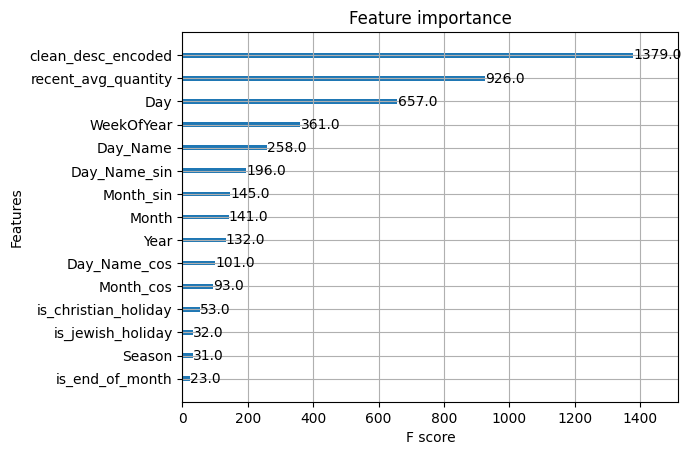

In [22]:
xgb.plot_importance(model, max_num_features=15)
plt.show()

In [19]:
# def generate_future_inputs(forecast_date: str, categories: list):
#     date = pd.to_datetime(forecast_date)
#     day = date.day
#     month = date.month
#     year = date.year
#     week = date.isocalendar().week
#     day_name = ((date.dayofweek + 1) % 7) + 1  # ◊®◊ê◊©◊ï◊ü = 1

#     # ◊™◊õ◊ï◊†◊ï◊™ ◊™◊ú◊ï◊ô◊ï◊™ ◊ñ◊û◊ü
#     is_weekend = 1 if day_name in [6, 7] else 0
#     is_jewish_holiday = date in il_holidays
#     is_christian_holiday = date in christian_holidays
#     is_near_jewish_holiday = (
#         (date + pd.Timedelta(days=1) in il_holidays) or
#         (date - pd.Timedelta(days=1) in il_holidays)
#     )
#     is_day_before_new_year = 1 if date.month == 12 and date.day == 31 else 0
#     is_start_of_month = int(day <= 3)
#     is_end_of_month = int(day >= 28)
#     season = (month % 12) // 3 + 1

#     # ◊§◊ô◊¶‚Äô◊®◊ô◊ù ◊û◊ó◊ñ◊ï◊®◊ô◊ô◊ù
#     day_name_sin = np.sin(2 * np.pi * day_name / 7)
#     day_name_cos = np.cos(2 * np.pi * day_name / 7)
#     month_sin = np.sin(2 * np.pi * month / 12)
#     month_cos = np.cos(2 * np.pi * month / 12)

#     future_rows = []

#     for cat in categories:
#         row = {
#             'Year': year,
#             'Month': month,
#             'Day': day,
#             'WeekOfYear': week,
#             'Day_Name': day_name,
#             'Is_Weekend': is_weekend,
#             'is_jewish_holiday': is_jewish_holiday,
#             'is_christian_holiday': is_christian_holiday,
#             'is_near_jewish_holiday': is_near_jewish_holiday,
#             'is_day_before_new_year': is_day_before_new_year,
#             'is_start_of_month': is_start_of_month,
#             'is_end_of_month': is_end_of_month,
#             'Season': season,
#             'Day_Name_sin': day_name_sin,
#             'Day_Name_cos': day_name_cos,
#             'Month_sin': month_sin,
#             'Month_cos': month_cos,
#             'clean_desc_encoded': cat,
#         }
#         future_rows.append(row)

#     return pd.DataFrame(future_rows)

In [20]:
# def forecast_per_category_for_date(
#     model,
#     df,
#     forecast_date: str,
#     model_features,
#     desc_map_df: pd.DataFrame):

#     categories = df['clean_desc_encoded'].unique()
#     future_df = generate_future_inputs(forecast_date, categories)

#     # ◊î◊™◊ê◊û◊î ◊ú◊¢◊û◊ï◊ì◊ï◊™ ◊î◊û◊ï◊ì◊ú ◊ë◊ú◊ë◊ì
#     future_df = future_df[[col for col in model_features]]

#     # ◊ó◊ô◊ñ◊ï◊ô
#     future_df['predicted_quantity'] = np.ceil(model.predict(future_df)).astype(int)

#     # ◊û◊ô◊§◊ï◊ô ◊©◊ù ◊î◊ß◊ò◊í◊ï◊®◊ô◊î
#     desc_map_dict = desc_map_df.set_index('code')['Unnamed: 0'].to_dict()
#     future_df['category_name'] = future_df['clean_desc_encoded'].map(desc_map_dict)

#     return future_df[['category_name', 'clean_desc_encoded', 'predicted_quantity']].sort_values(
#         by='predicted_quantity', ascending=False)

In [21]:
# # ◊ì◊ï◊í◊û◊î ◊ú◊©◊ô◊û◊ï◊©:
# model_features = X_train.columns.tolist()

# forecast_results = forecast_per_category_for_date(
#     model=model,
#     df=df,
#     forecast_date='2025-01-01',
#     model_features=model_features,
#     desc_map_df=desc_encoding_map)

# forecast_results.head()